# ИУ5-83Б ЛБ_3 Пермяков Д.К. Вариант 13

---

## Задание 1.

В процессе эксплуатации ЭВМ осуществляются ее разовые проверки, в результате которых она может оказаться в следующих состояниях:
- $S_1$ - ЭВМ полностью исправна;
- $S_2$ - ЭВМ имеет незначителльные неисправности в программном обеспечении, при которых она может решать задачи;
- $S_3$ - ЭВМ имеет существенные неисправности и может решать ограниченный класс задач;
- $S_4$ - ЭВМ полностью вышла из строя.

В начальный момент времени ЭВМ полностью исправна (состояние $S_1$). Проверка ЭВМ производится в фиксированные моменты времени $t_k$. Процесс, протекающий в системе, может рассматриваться как однородная марковская цепь с $k$ шагами ($1, 2,\ldots, k$ проверки). Матрица переходных вероятностей имеет вид:
\begin{equation}
P = \begin{pmatrix} p_{11} & p_{12} & p_{13} & p_{14} \\ 0 & p_{22} & p_{23} & p_{24} \\0 & 0 & p_{33} & p_{34}\\ 0 & 0 & 0 & p_{44}\end{pmatrix}
\end{equation}

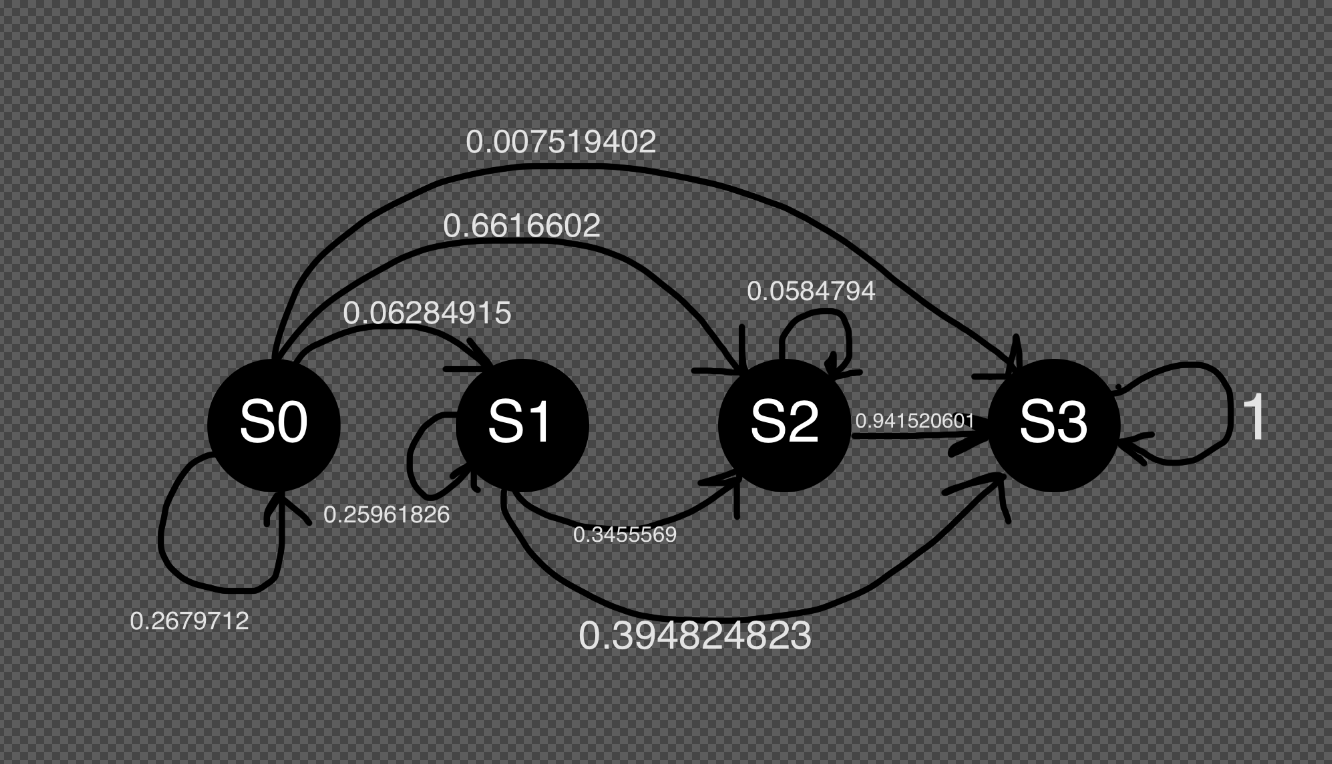

Построить граф состояний. Найти вероятности (численно и теоретически) состояний ЭВМ после $k-2, k-1, k$ осмотров.

In [ ]:
Variant<-13
set.seed(Variant)
k<-sample(c(4:9),1)
pp1<-runif(4)
pp2<-runif(3)
pp3<-runif(2)
p1<-pp1/sum(pp1)
p2<-c(c(0),pp2/sum(pp2))
p3<-c(c(0,0),pp3/sum(pp3))
p4<-c(0,0,0,1)
P<-data.frame()
P<-rbind(P,p1)
P<-rbind(P,p2)
P<-rbind(P,p3)
P<-rbind(P,p4)
rownames(P)<-c("p1","p2","p3","p4")
colnames(P)<-c("","","","")
View(P)
print(paste("k=",as.character(k)))

,,,,
,<dbl>,<dbl>,<dbl>,<dbl>
p1,0.2679712,0.06284915,0.6616602,0.007519402
p2,0.0000000,0.25961826,0.3455569,0.394824823
p3,0.0000000,0.00000000,0.0584794,0.941520601
p4,0.0000000,0.00000000,0.0000000,1.000000000


[1] "k= 6"


### Теоретическое решение

начальное состояние - S1\
начальный вектор p0 = (1, 0, 0, 0)

In [ ]:
P <- matrix(
  c(
    p1[1], p1[2], p1[3], p1[4],
    p2[1], p2[2], p2[3], p2[4],
    p3[1], p3[2], p3[3], p3[4],
    p4[1], p4[2], p4[3], p4[4]
  ),
  nrow = 4,
  byrow = TRUE
)
p0 <- matrix(
  c(
    1, 0, 0, 0
  ),
  ncol = 4,
  byrow = TRUE
)


In [ ]:
install.packages("matrixcalc")
library(matrixcalc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
k <- 6
p0 %*% matrix.power(P, k)

k <- 5
p0 %*% matrix.power(P, k)

k <- 4
p0 %*% matrix.power(P, k)

0.0003702789,0.0004821077,0.0018068,0.9973408


0.001381786,0.00152248,0.006265866,0.9908299


0.005156472,0.004616009,0.02152792,0.9686996


Проверим экспериментально

In [ ]:
get_vector <- function(k) {
  vec_sost <- c()
  for (i in (1:50000)) {
    sost<-1
    for (k in(1:k)){
      p<-runif(1)
      if (sost == 1) {
        if(p >= sum(p1[1:3])) {
          sost<-4
        } else if (p >= sum(p1[1:2])) {
          sost<-3
        } else if (p >= sum(p1[1:1])) {
          sost<-2
        }
      } else if (sost == 2) {
        if(p >= sum(p2[1:3])) {
          sost<-4
        } else if (p >= sum(p2[1:2])) {
          sost<-3
        }
      } else if (sost == 3) {
        if(p >= sum(p3[1:3])) {
          sost<-4
        }
      }
    }
    vec_sost[i] <- sost
  }
  return (vec_sost)
}

In [ ]:
vec_sost <- get_vector(6)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00032 0.00056 0.00154 0.99758 

In [ ]:
vec_sost <- get_vector(5)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00114 0.00142 0.00642 0.99102 

In [ ]:
vec_sost <- get_vector(4)
table(vec_sost)/sum(table(vec_sost))

vec_sost
      1       2       3       4 
0.00504 0.00460 0.02152 0.96884 

## Задание 2

1. Интенсивность поступления программ на сервер:
   $
   \lambda = \frac{k}{t_1}
   $

2. Интенсивность выполнения программ сервером:
   $
   \mu = \frac{1}{t_2}
   $

3. Коэффициент загрузки системы:
   $
   \rho = \frac{\lambda}{\mu}
   $

4. Вероятность того, что программа не будет выполнена сразу:
   $
   P_n = \rho
   $

5. Среднее время до получения результатов:
   $
   T_{\text{get}} = \frac{1}{\mu (1 - \rho)}
   $

6. Среднее количество программ в очереди:
   $
   L_{\text{оч}} = \frac{\rho^2}{1 - \rho}
   $


---------------------------------------

In [ ]:
Variant<-13
set.seed(Variant)
k<-sample(c(10:25),1)
t1<-sample(c(14:20),1)
t2<-sample(c(2:5),1)
View(data.frame(k,t1,t2))

k,t1,t2
<int>,<int>,<int>
17,16,5


Абсолютная пропускная способность системы

$$\mu = \frac{1}{t_2}$$

Суммарная интенсивность потока заявок от программистов

$$\lambda = \frac{k}{t_1}$$

Интенсивность нагрузки

$$\rho=\frac{\lambda}{\mu}$$

In [ ]:
lambda <- k/t1
mu <- 1/t2
ro <- lambda / mu
ro

[1] 5.3125

 Поток приходящих заявок получился больше потока обработки, что приводит к бесконечному росту очереди. Поэтому увеличу t1 в 4 раза до 100

In [ ]:
t1 <- 100

In [ ]:
lambda <- k/t1
mu <- 1/t2
ro <- lambda / mu
ro

[1] 0.85

## Численный расчёт

Вероятность выполнения программы сразу

$$P_0=1-\rho$$

In [ ]:
P0 <- 1 - ro

Вероятность того, что программа не будет выполненна сразу
$$P|_{Q>0} = 1 - P_0$$

In [ ]:
Pn_theory <- 1 - P0

Среднее время до получения пользователем результатов реализации
$$W_{\text{оч}}=T_{\text{сист}}-\frac{1}{\mu}=\frac{\rho^2}{\lambda(1-\rho)}$$

In [ ]:
Tget_theory <- ro^2 / (lambda * (1 - ro))

Среднее число программ в очереди

$$L_{\text{оч}}=\lambda\cdot W_{\text{оч}}=\frac{\rho^2}{(1-\rho)}$$

In [ ]:
Loch_theory <- ro^2 / (1 - ro)

## Эксперимент

In [ ]:
Tend <- 300000
# тек время
tsys <- 0

prep_times <- c(1:k) # вектор времени, когда программисты подготовят свои программы.
for (i in 1:k) {
  prep_times[i] <- tsys + rexp(1, 1 / t1)
}
arrival_times <- c() # массив времен, когда программы поступили на сервер

counter_deploy <- 1 # счетчик поступивших программ.
counter_ready  <- 1 # счетчик завершенных программ.
system_count   <- 1 # текущее количество программ в системе (очередь + выполняемая)

immediate_count <- 0 # количество программ, выполненных сразу же.
waiting_count   <- 0 # количество программ, ожидавших выполнения.

Tget_vec  <- c() #  массив времен получения результатов программ.

sys_free  <- TRUE # флаг, показывающий, свободен ли сервер.
ready_time <- Tend + 1 # время завершения текущей выполняемой программы.

queue_change_times <- c(tsys) # массивы для анализа загрузки системы.
queue_sizes        <- c(0)

In [ ]:
while (tsys < Tend) {
  # количество программистов, работающих одновременно.
  for (i in 1:k) {
    # 	Если tsys совпадает значит программа поступила.
    if (tsys == prep_times[i]) {
      # Если в момент поступления сервер свободен, программа сразу выполняется
      if (counter_deploy == counter_ready) {
        immediate_count <- immediate_count + 1
      } else {
        waiting_count <- waiting_count + 1
      }
      # Запоминаем момент поступления программы.
      arrival_times[counter_deploy] <- tsys
      # Увеличиваем счетчик поданных программ
      counter_deploy <- counter_deploy + 1

      # Генерируем новое время подготовки следующей программы этим программистом.
      prep_times[i] <- tsys + rexp(1, 1 / t1)

      # Увеличиваем количество программ в системе.
      system_count <- system_count + 1
      # Запоминаем время изменения очереди.
      queue_change_times <- c(queue_change_times, tsys)
      # Обновляем размер очереди
      queue_sizes        <- c(queue_sizes, max(system_count - 1, 0))
    }
  }

  # Если текущее время достигло ready_time, значит программа завершила выполнение.
  if (tsys == ready_time) {
    Tget_vec[counter_ready] <- tsys - arrival_times[counter_ready]
    counter_ready <- counter_ready + 1
    sys_free <- TRUE
  }

  # Если сервер свободен
  if (sys_free) {
    # Если есть программы в очереди
    if (counter_deploy > counter_ready) {
      ready_time <- tsys + rexp(1, 1 / t2)
      sys_free <- FALSE
      system_count <- system_count - 1
      queue_change_times <- c(queue_change_times, tsys)
      queue_sizes        <- c(queue_sizes, max(system_count - 1, 0))
    } else {
      ready_time <- Tend + 1
    }
  }

  tsys <- min(min(prep_times), ready_time)
}

In [ ]:
Tget_vec <- Tget_vec[1:(counter_ready - 1)]
Pn_exp   <- waiting_count / (immediate_count + waiting_count)
Tget_exp <- mean(Tget_vec)

if (tail(queue_change_times, 1) < Tend) {
  queue_change_times <- c(queue_change_times, Tend)
  queue_sizes <- c(queue_sizes, tail(queue_sizes, 1))
}
avg_queue <- sum(diff(queue_change_times) * queue_sizes[1:(length(queue_change_times) - 1)]) / (Tend - queue_change_times[1])


## Сравнение результатов

In [ ]:
results <- data.frame(
  Параметр = c("Вероятность ожидания",
               "Среднее время до результата (мин)",
               "Среднее число в очереди"),
  Теория = c(round(Pn_theory, 4), round(Tget_theory, 4), round(Loch_theory, 4)),
  Эксперимент = c(round(Pn_exp, 4), round(Tget_exp, 4), round(avg_queue, 4))
)
View(results)

Параметр,Теория,Эксперимент
<chr>,<dbl>,<dbl>
Вероятность ожидания,0.8500,0.8460
Среднее время до результата (мин),28.3333,31.5235
Среднее число в очереди,4.8167,4.5297
